In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn flask imbalanced-learn requests chart-studio


Initial class distribution: [3 2]
Balanced class distribution: [3 3]
Model Accuracy: 0.50


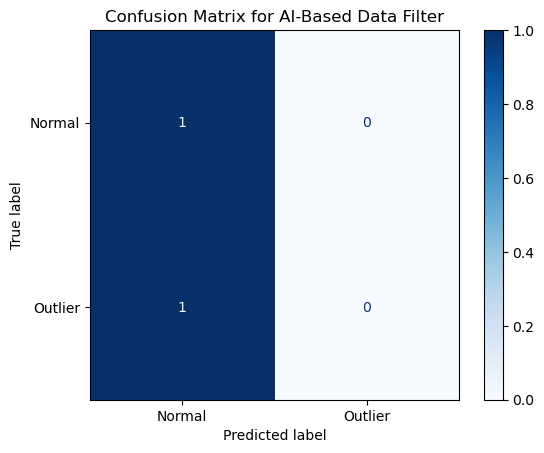

Model saved as 'deployed_model.pkl'


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from imblearn.over_sampling import SMOTE

# Creating a small dataset for demonstration
features = [[10], [20], [30], [40], [50]]
labels = [0, 0, 0, 1, 1]

# Checking class distribution before applying SMOTE
print("Initial class distribution:", np.bincount(labels))

# Applying SMOTE for class balancing
smote = SMOTE(random_state=21, k_neighbors=1)
features_resampled, labels_resampled = smote.fit_resample(features, labels)

# Checking class distribution after SMOTE
print("Balanced class distribution:", np.bincount(labels_resampled))

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_resampled, labels_resampled, test_size=0.25, random_state=21, stratify=labels_resampled
)

# Initializing and training a Random Forest model
model = RandomForestClassifier(
    random_state=21,
    n_estimators=50,
    max_depth=6,
    min_samples_split=8,
    min_samples_leaf=4,
    n_jobs=-1,
    max_samples=0.9
)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Generating and displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Normal", "Outlier"])
display.plot(cmap='Blues')
plt.title("Confusion Matrix for AI-Based Data Filter")
plt.show()
import pickle

# Save the trained model
with open("deployed_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as 'deployed_model.pkl'")

In [11]:
import requests

url = "http://127.0.0.1:5000/predict"
data = {"features": [2.5]}

try:
    response = requests.post(url, json=data)
    response.raise_for_status()  # Raises an error if request fails
    print(response.json())

except requests.exceptions.RequestException as e:
    print("Request failed:", e)


Request failed: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002011994FD70>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
